In [11]:
#Data Loading and Cleaning
import pandas as pd
import re

# Load the dataset
file_path = "F:/Jobs/Certificates/British_Airways/Dataset_BA_Reviews.csv"
reviews_df = pd.read_csv(file_path)

# Clean the data
def clean_review(review):
    review = re.sub(r'✅ Trip Verified', '', review)
    review = re.sub(r'Trip Verified', '', review)
    return review.strip()

reviews_df['cleaned_reviews'] = reviews_df['reviews'].apply(clean_review)
# Display the first few rows of the dataset
print(reviews_df.head())

   Unnamed: 0                                            reviews  \
0           0  Not Verified |  We had a Premium Economy retur...   
1           1  ✅ Trip Verified |  I should like to review my ...   
2           2  ✅ Trip Verified | We have flown with British A...   
3           3  ✅ Trip Verified | I sat in the plane at Vienna...   
4           4  ✅ Trip Verified | It is almost 11pm we were su...   

                                     cleaned_reviews  
0  Not Verified |  We had a Premium Economy retur...  
1  |  I should like to review my flight with Brit...  
2  | We have flown with British Airways a few tim...  
3  | I sat in the plane at Vienna airport for thr...  
4  | It is almost 11pm we were supposed to take o...  


Positive    625
Negative    365
Neutral      10
Name: sentiment, dtype: int64


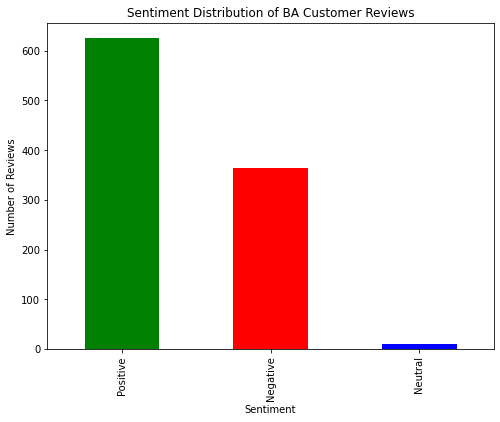

In [8]:
#Sentiment Analysis

from textblob import TextBlob

# Sentiment analysis function
def get_sentiment(review):
    analysis = TextBlob(review)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply sentiment analysis
reviews_df['sentiment'] = reviews_df['cleaned_reviews'].apply(get_sentiment)

# Display sentiment distribution
sentiment_distribution = reviews_df['sentiment'].value_counts()
print(sentiment_distribution)

# Visualize sentiment distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sentiment_distribution.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution of BA Customer Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()


In [9]:
#Topic Modeling
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize the text data
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(reviews_df['cleaned_reviews'])

# Fit LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Display topics
def display_topics(model, feature_names, no_top_words):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        topic_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        topics.append(" ".join(topic_words))
    return topics

no_top_words = 10
feature_names = vectorizer.get_feature_names_out()
topics = display_topics(lda, feature_names, no_top_words)

# Print topics
for i, topic in enumerate(topics):
    print(f"Topic {i+1}: {topic}")


Topic 1: flight line staff asked hours voucher told ba time amsterdam
Topic 2: ba flight service airways british customer london airline luggage flights
Topic 3: flight ba british airways hours london service told cancelled customer
Topic 4: flight ba crew food good seat service cabin class seats
Topic 5: ba flight staff heathrow service plane london time bag airport


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yuan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yuan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


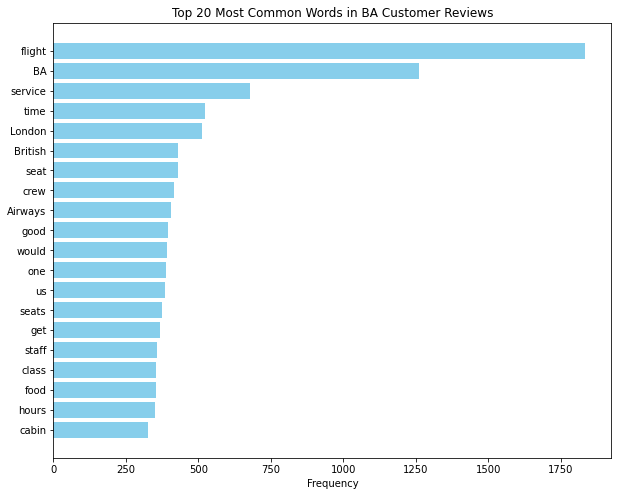

In [10]:
#Visualization: Word Frequency Bar Chart
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download necessary nltk resources
nltk.download('punkt')
nltk.download('stopwords')

# Combine all reviews into a single string
all_reviews = " ".join(review for review in reviews_df['cleaned_reviews'])

# Tokenize and remove stopwords
stop_words = set(stopwords.words('english'))
word_tokens = word_tokenize(all_reviews)
filtered_words = [word for word in word_tokens if word.lower() not in stop_words and word.isalpha()]

# Compute word frequency
word_counts = Counter(filtered_words)
common_words = word_counts.most_common(20)

# Generate bar chart
words, counts = zip(*common_words)
plt.figure(figsize=(10, 8))
plt.barh(words, counts, color='skyblue')
plt.xlabel('Frequency')
plt.title('Top 20 Most Common Words in BA Customer Reviews')
plt.gca().invert_yaxis()  # Highest frequency at the top
plt.show()
